# I-94 Traffic Indicators

We're going to analyze a dataset about the westbound traffic on the I-94 Interstate highway.
The dataset was acquired from the UCI Machine Learning Repository.
The dataset documentation mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic (cars moving from east to west).

Each row of the dataset is information about the traffic condition and weather information at a particular hour of the day(hence each day has 24 rows). The dataset contains information about traffic condition from October of 2012 to September of 2018. The total number of rows in dataset are 48205. 

# Objective

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. After analysis, our objective is to present our findings and communicate it through visualizations.

The results of our analysis will be about the westbound traffic in the proximity of a particular station. In other words, we should avoid generalizing our results for the entire I-94 highway.

# Loading the data

In [1]:
import pandas as pd

traffic = pd.read_csv(r'C:\Users\nbnav\OneDrive\Desktop\Dataquest\i94_interstate_highway.csv')

# Exploring the dataset

In [2]:
print(traffic.head())
print(traffic.tail())
traffic.info()

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description         date_time  traffic_volume  
0    scattered clouds  02-10-2012 09:00            5545  
1       broken clouds  02-10-2012 10:00            4516  
2     overcast clouds  02-10-2012 11:00            4767  
3     overcast clouds  02-10-2012 12:00            5026  
4       broken clouds  02-10-2012 13:00            4918  
      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0          90  Thunder

# Converting date_time column to datetime

In [3]:
traffic["date_time"] = pd.to_datetime(traffic["date_time"])
print(traffic["date_time"].dtype)

datetime64[ns]


# Examining the traffic volume distribution

<AxesSubplot:>

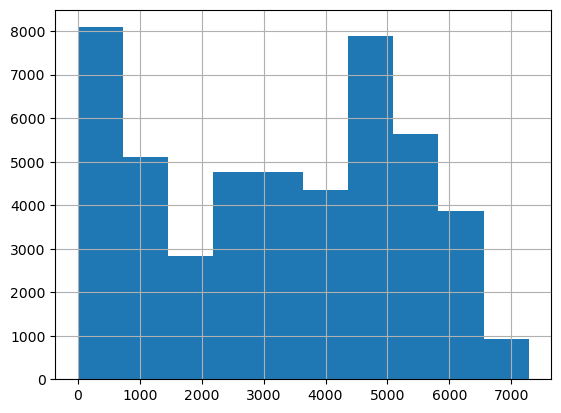

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

traffic["traffic_volume"].hist()


In [5]:
traffic["traffic_volume"].describe(include=all)

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

The mean traffic volume on this section of highway is 3260 cars with max being 7280 and min being 0. There is no clear distribution of values in the traffic volume with highest instances of <1000 cars but that could be due the fact that traffic volume data during nighttime was included. We could seperate the nighttime and daytime data and see how that impacts the distribution.

In [6]:
traffic["hour_of_day"] = traffic["date_time"].dt.hour

In [7]:
daytime = traffic[traffic["hour_of_day"].between(8, 20)]
nighttime = traffic[~traffic["hour_of_day"].between(8, 20)]

# Making histograms of traffic volume of daytime and nighttime

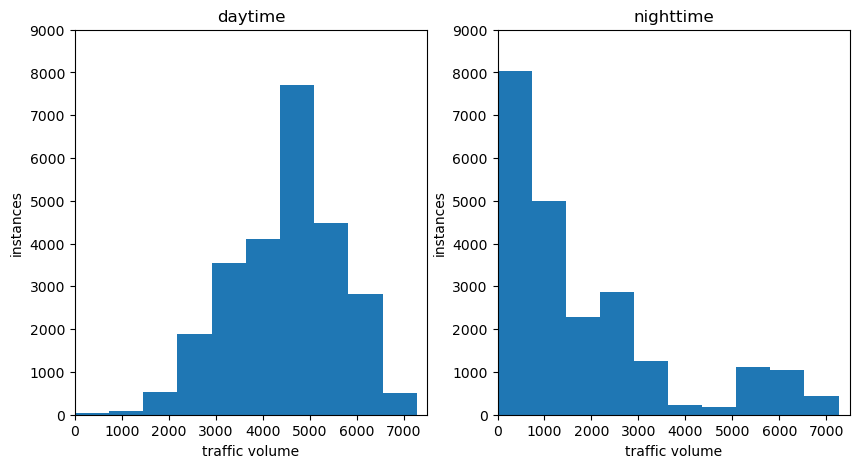

In [8]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(daytime["traffic_volume"])
plt.title('daytime')
plt.xlabel('traffic volume')
plt.ylabel('instances')
plt.xlim(0, 7500)
plt.ylim(0, 9000)
plt.subplot(1, 2, 2)
plt.hist(nighttime["traffic_volume"])
plt.title('nighttime')
plt.xlabel('traffic volume')
plt.ylabel('instances')
plt.xlim(0, 7500)
plt.ylim(0, 9000)
plt.show()

As is evident from the graph, the nighttime usually have instances of <1000 cars on the road while the daytime has the most instances of having between 4000 and 5000 cars on the road.

To correctly determine the indicators of heavy traffic on I-94, we shall keep our analysis to daytime only.

Since we set out to find out the indicators of heavy traffic, we shall now proceed to identify the parameters that cause the heavy traffic during daytime. Let's start by spoting the time, hour and month which leads to heavy traffic.

In [11]:
daytime["month"] = daytime["date_time"].dt.month
by_month = daytime.groupby("month").mean()

C:\Users\nbnav\AppData\Local\Temp\ipykernel_18524\1867434013.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime["month"] = daytime["date_time"].dt.month


In [14]:
by_month["traffic_volume"]

month
1     4379.180010
2     4461.809320
3     4611.692817
4     4448.678634
5     4507.701040
6     4613.777886
7     4526.438745
8     4657.999551
9     4642.444498
10    4581.940111
11    4378.903873
12    4231.148016
Name: traffic_volume, dtype: float64

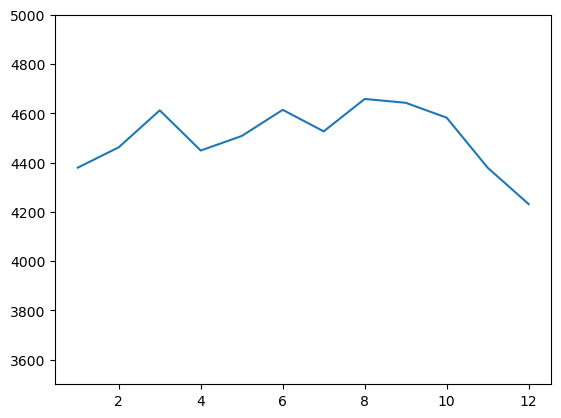

In [20]:
plt.plot(by_month["traffic_volume"])
plt.ylim(3500, 5000)
plt.show()

It seems like traffic reamins quite constant throughout the year with December showing a slight downtrend compared to the rest of the months. 

Now let's compare the traffic volume based on the day of week.

In [27]:
daytime["day_of_week"] = daytime.["date_time"].dt.dayofweek
by_day_of_week = daytime.groupby("day_of_week").mean()

C:\Users\nbnav\AppData\Local\Temp\ipykernel_18524\3087482208.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime["day_of_week"] = daytime.copy()["date_time"].dt.dayofweek


In [24]:
by_day_of_week["traffic_volume"]
# 0 = monday, 6 = sunday

day_of_week
0    4520.033607
1    4694.058534
2    4776.785869
3    4751.171646
4    4742.493041
5    4122.441345
6    3899.699425
Name: traffic_volume, dtype: float64

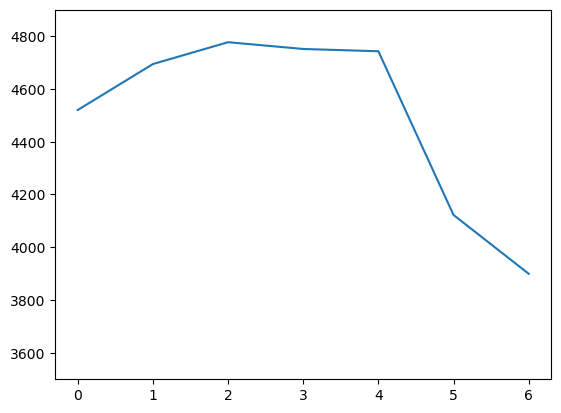

In [26]:
plt.plot(by_day_of_week["traffic_volume"])
plt.ylim(3500, 4900)
plt.show()

The graph indicates that weekdays are heavy rush days while the weekends see less rush of cars which seems expected since weekends are holidays.

We want to see exactly which time of daytime has the most rush and since weekends would tend to skew our results, we shall analyze it seperately.

In [28]:
daytime["hour"] = daytime["date_time"].dt.hour
weekdays = daytime[daytime["day_of_week"] <= 4]
weekends = daytime[daytime["day_of_week"] > 4]
weekdays_traffic = weekdays.groupby("hour").mean()
weekends_traffic = weekends.groupby("hour").mean()


C:\Users\nbnav\AppData\Local\Temp\ipykernel_18524\1723837313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime["hour"] = daytime["date_time"].dt.hour


In [30]:
weekdays_traffic["traffic_volume"]
weekends_traffic["traffic_volume"]

hour
8     3137.225539
9     3564.674783
10    3839.516074
11    4164.141831
12    4472.171480
13    4458.324226
14    4554.262032
15    4662.404412
16    4819.592199
17    4590.694946
18    3950.550459
19    3228.526221
20    2812.396429
Name: traffic_volume, dtype: float64

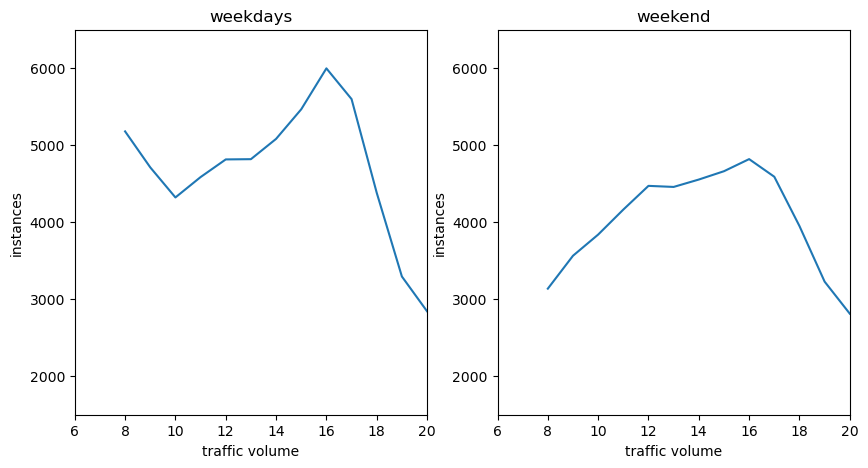

In [34]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(weekdays_traffic["traffic_volume"])
plt.title('weekdays')
plt.xlabel('traffic volume')
plt.ylabel('instances')
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.subplot(1, 2, 2)
plt.plot(weekends_traffic["traffic_volume"])
plt.title('weekend')
plt.xlabel('traffic volume')
plt.ylabel('instances')
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.show()

We can see that during daytime, on weekdays, the time between 4:00 PM and 6:00 PM has the highest rush.

# Weather indicators

Another possible determiner of traffic could be weather, hence we will see if specif weather affects the rush on I94 highway.

# Calculating correlation

In [36]:
daytime.corr()['traffic_volume']

temp              0.126927
rain_1h           0.005251
snow_1h           0.007978
clouds_all       -0.031984
traffic_volume    1.000000
hour_of_day      -0.192398
month            -0.015982
day_of_week      -0.189475
hour             -0.192398
Name: traffic_volume, dtype: float64

The relevant columns are - 'temp', 'rain1h', 'snow1h', 'cloudsall'.
The highest correlation among these is the 'temp' column (+0.12).
Let's plot it on a scatter plot and see it's relevance.

(200.0, 350.0)

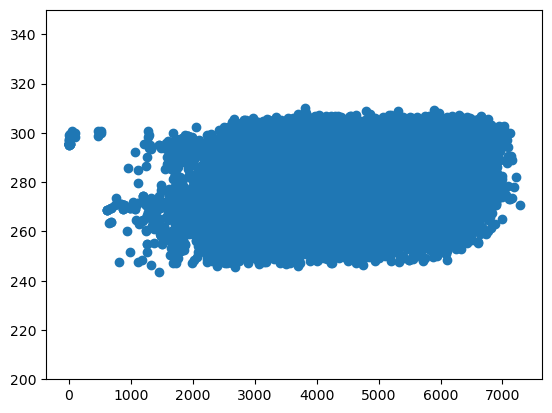

In [39]:
plt.scatter(daytime["traffic_volume"], daytime["temp"])
plt.ylim(200, 350)

We can conclude that temperature doesn't look like a solid indicator of heavy traffic.

Let's now look at the other weather-related columns: weather_main and weather_description

<AxesSubplot:ylabel='weather_main'>

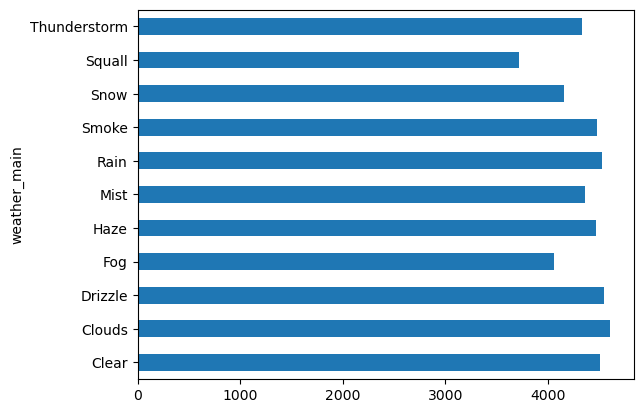

In [42]:
weather_main = daytime.groupby("weather_main").mean()
weather_main["traffic_volume"].plot.barh()

There dosen't seem to be any clear outlier or condition which had more cars than usual. We have one more column that can give us any insights if weather can be a indicator to traffic rush.

In [43]:
weather_desc = daytime.groupby("weather_description").mean()

<AxesSubplot:ylabel='weather_description'>

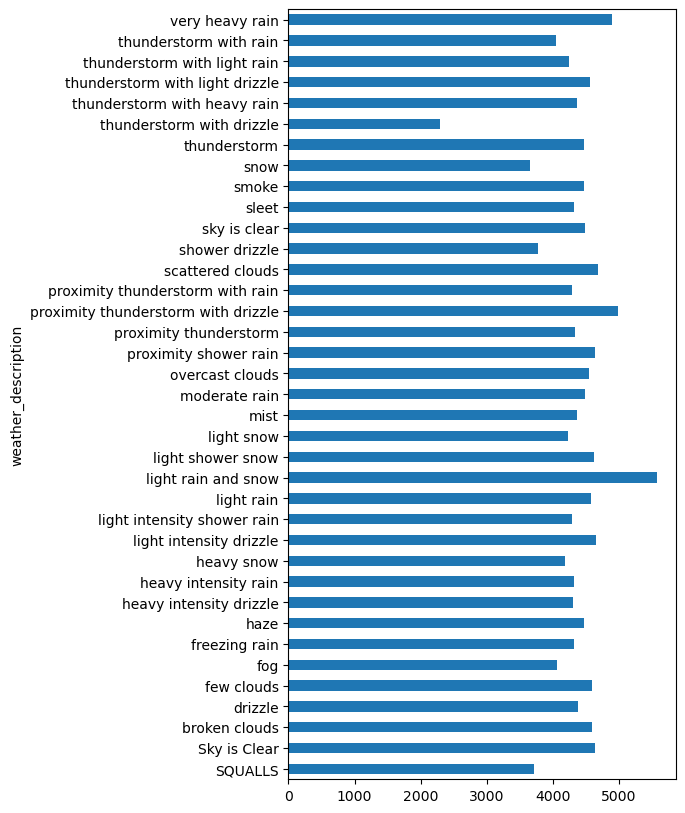

In [45]:
weather_desc["traffic_volume"].plot.barh(figsize=(5, 10))

Seems kile light rain and snow positively affects the traffic while thunderstorm with drizzle makes people stay inside.


# Conclusion

In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

Time indicators
1. The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
2. The traffic is usually heavier on business days compared to the weekends.
3. On business days, the rush hours are around 4PM to 6PM.


Weather indicators
1. Shower snow
2. Light rain and snow
3. Proximity thunderstorm with drizzle